* OPV (oral polio vaccine):
    * Dose 1: birth
    * Dose 2: 6 weeks
    * Dose 3: 10 weeks,
    * Dose 4: 14 weeks*
* DTP (diphtheria, tetanus, pertussis):
    * Dose 1: 6 weeks
    * Dose 2: 10 weeks
    * Dose 3: 14 weeks*

I will attempt to label the data for supervised learning. I will define logic for two labels:
* `high_risk`: child is partly vaccinated by 6 months
* `low_risk`: child is fully or partly vaccinated by 4 months

I will only include information up to 4 months and will exclude `exit_age` feature.

In [1]:
%reload_kedro

2020-06-08 13:08:10,590 - root - INFO - ** Kedro project Immunization Drop-outs
2020-06-08 13:08:10,591 - root - INFO - Defined global variable `context` and `catalog`


In [2]:
dff = catalog.load("feature_table")

2020-06-08 13:08:15,448 - kedro.io.data_catalog - INFO - Loading data from `feature_table` (CSVDataSet)...


In [3]:
dff.head()

,pat_id,facility,region,gender,first_vaccine,enrollment_age,exit_age,opv_by_4mths,opv_by_6mths,dtp_by_4mths,dtp_by_6mths
0,1,51.0,Ghanzi,f,OPV,1,23,2,4,1,3
1,2,89.0,Chobe,f,OPV,0,0,1,1,0,0
2,3,161.0,Central,m,OPV,0,6,2,2,1,1
3,4,168.0,Central,f,OPV,6,34,1,2,1,1
4,5,183.0,Central,m,OPV,2,20,3,4,2,2


In [12]:
def assign_label(x0, x1, x2, x3):
    """
    Assign `high` and `low` label to each patient based on a simple logic.
    """
    if (x0 < 4) & (x1 < 3) & (x2 < 4) & (x3 < 3):
        label = 'high'
    elif (x0 == 4) & (x3 < 3):
        label = 'high'
    elif (x3 == 3) & (x2 < 4):
        label = 'high'
    else:
        label = 'low'
    return label

In [13]:
dff['label'] = dff.apply(lambda x: assign_label(x.opv_by_4mths, x.dtp_by_4mths, x.opv_by_6mths, x.dtp_by_6mths), axis=1)

In [14]:
dff.head()

,pat_id,facility,region,gender,first_vaccine,enrollment_age,exit_age,opv_by_4mths,opv_by_6mths,dtp_by_4mths,dtp_by_6mths,label
0,1,51.0,Ghanzi,f,OPV,1,23,2,4,1,3,low
1,2,89.0,Chobe,f,OPV,0,0,1,1,0,0,high
2,3,161.0,Central,m,OPV,0,6,2,2,1,1,high
3,4,168.0,Central,f,OPV,6,34,1,2,1,1,high
4,5,183.0,Central,m,OPV,2,20,3,4,2,2,low


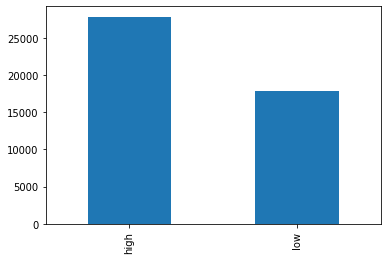

In [15]:
dff['label'].value_counts().plot(kind='bar')

In [16]:
def create_label_table(feature_table):
    """
    Create dataframe with label column (based on feature table).
    """
    feature_table['label'] = feature_table.apply(lambda x: assign_label(x.opv_by_4mths,
                                                                        x.dtp_by_4mths, 
                                                                        x.opv_by_6mths, 
                                                                        x.dtp_by_6mths), axis=1)
    return feature_table

In [17]:
df = create_label_table(dff)
df.head()

,pat_id,facility,region,gender,first_vaccine,enrollment_age,exit_age,opv_by_4mths,opv_by_6mths,dtp_by_4mths,dtp_by_6mths,label
0,1,51.0,Ghanzi,f,OPV,1,23,2,4,1,3,low
1,2,89.0,Chobe,f,OPV,0,0,1,1,0,0,high
2,3,161.0,Central,m,OPV,0,6,2,2,1,1,high
3,4,168.0,Central,f,OPV,6,34,1,2,1,1,high
4,5,183.0,Central,m,OPV,2,20,3,4,2,2,low
